In [108]:
import numpy as np
import pandas as pd

# **1、读取文件和显示文件**

In [109]:
data = pd.read_csv(r"C:/Users/hxy/Downloads/archive/iris.csv", header=0)# 本地文件使用此方法导入，无本地文件采用sklearn调用；  header=0 第一行为表头

# from sklearn.datasets import load_iris #采用sklearn调用数据集
# data = load_iris()
data
#显示前n行记录，默认n的值为5.
# data.head(10)
#显示末尾n行记录，默认n的值为5.
# data.tail(10)

#随机抽取样本。默认抽取一条，可以通过参数进行指定抽取样本数量
# print(data.sample(10))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **2、对文本进行映射**

In [110]:
data["Species"] = data["Species"].map({"Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2}) # 类别名称映射为数字
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# **3、删除无用数据**

In [111]:
data = data.drop("Id",axis=1,inplace=True)  # 删除列； axis=1为列，0为行；inplace=True 在原数据上修改。

# **4、查询重复数据**

In [115]:
# data.duplicated().any()
# if data.duplicated().any(): # 重复值
#     data.drop_duplicates(inplace=True) #删除重复值
#     print(len(data))
# data["Species"].value_counts()  # 查看各个类别的鸢尾花记录
# print(len(data))

In [ ]:
print(len(data))

# **5、KNN算法引入**

In [ ]:
class KNN:
    '''使用KNN实现K近邻算法实现分类'''
    def __init__(self, k):
        '''初始化

        Parameters
        -----
        k:int
            邻居的个数

        '''
        self.k = k
    def fit(self, X, y):
        '''训练

        Parameeters
        -----
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 类数组类型，形状为：[样本数量]

        '''
        self.X = np.asarray(X) #转换为ndarray类型
        self.y = np.asarray(y)
    def predict(self, X):
        '''对样本进行预测
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离(返回数组排序后，每个元素在元数据中的索引)
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)
    def predict2(self, X):
        '''对样本进行预测，加入权重计算
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result2 = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index], weights=1/dis[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result2.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result2)

# **6、分层抽样，划分训练集、测试集**

In [ ]:
# 提取每个类中鸢尾花数据
t0 = data[data["Species"]==0]
t1 = data[data["Species"]==1]
t2 = data[data["Species"]==2]
# 打乱# 打乱每个类别数据
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 分配训练集和数据集，axis=0表示按纵向方式拼接
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

# **设置k值，进行训练**

In [113]:
knn = KNN(k=3)
knn.fit(X=train_X, y=train_y)
result2 = knn.predict2(test_X)
# display(result)
# display(test_y)
display(np.sum(result2==test_y)/len(result2))

1.0

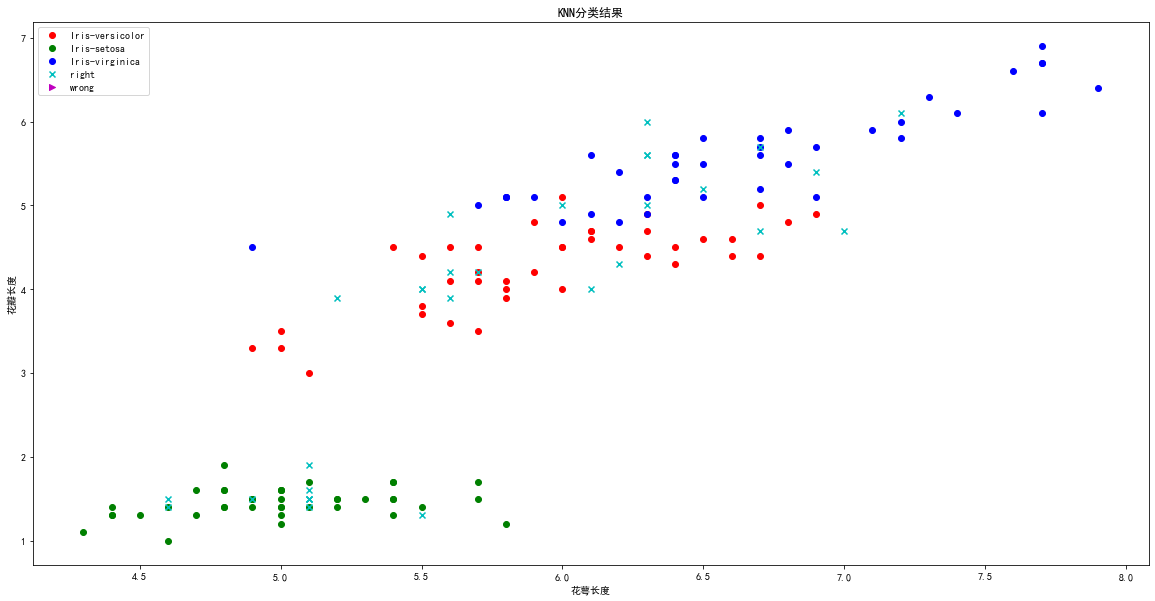

In [114]:
# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号
plt.scatter(x=t0["SepalLengthCm"][:40], y=t0["PetalLengthCm"][:40], color='r', label="Iris-versicolor")
plt.scatter(x=t1["SepalLengthCm"][:40], y=t1["PetalLengthCm"][:40], color='g', label="Iris-setosa")
plt.scatter(x=t2["SepalLengthCm"][:40], y=t2["PetalLengthCm"][:40], color='b', label="Iris-virginica")
right = test_X[result2 == test_y]
wrong = test_X[result2 != test_y]
plt.scatter(x=right["SepalLengthCm"], y=right["PetalLengthCm"], color='c', label="right", marker="x")
plt.scatter(x=wrong["SepalLengthCm"], y=wrong["PetalLengthCm"], color='m', label="wrong", marker=">")
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()